             Class Substance  T_B (K)  H_v (kcal/mol)
0  Perfect liquids        Ar    87.29           1.558
1  Perfect liquids        Kr   119.93           2.158
2  Perfect liquids        Xe   165.10           3.021
3  Perfect liquids        Rn   211.00           3.920
4  Perfect liquids        N2    77.34           1.333


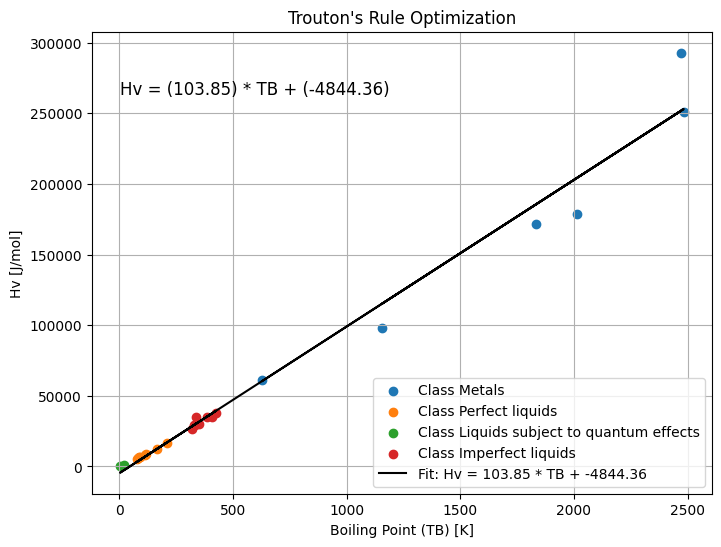

Optimized Slope (ΔSv): 103.85 J/mol
Optimized Intercept: -4844.36 J/mol
OLS Slope (Problem 1): 103.85 J/mol
OLS Intercept (Problem 1): -4844.60 J/mol
The slope from optimization matches the slope from OLS regression.


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Load the dataset provided by the user
data = pd.read_csv('trouton.csv')

# Display the first few rows of the dataset to understand its structure
print(data.head())

# Convert Hv from kcal/mol to J/mol (not dividing by T_B since we want J/mol, not J/mol-K)
data['H_v (J/mol)'] = data['H_v (kcal/mol)'] * 4184

# Extract relevant columns
TB = data['T_B (K)'].values
Hv_j_mol = data['H_v (J/mol)'].values
Class = data['Class'].values

# 2-1 Checking point 1) define a suitable objective function based on the least squares error between the predicted and actual values
def objective(params, TB, Hv):
    """
    Objective function to minimize: Sum of squared residuals.
    params: List containing the slope (a) and intercept (b) of the linear model.
    TB: Array of boiling points (independent variable).
    Hv: Array of enthalpy values (dependent variable).
    Returns the sum of squared differences between the predicted and actual values.
    """
    a, b = params  # Unpack the slope and intercept from params
    Hv_pred = a * TB + b  # Linear model: Hv = a * TB + b
    return np.sum((Hv - Hv_pred) ** 2)  # Return the sum of squared residuals

# 2-1 Checking point 2) implement a script that uses scipy.optimize.minimize to find the optimal slope (a) and intercept (b) that minimize the least squares error
initial_guess = [0, 0]  # Initial guesses for a (slope) and b (intercept)
result = minimize(objective, initial_guess, args=(TB, Hv_j_mol))
a_opt, b_opt = result.x  # Optimized slope and intercept

# Predict Hv using the optimized parameters
Hv_predicted = a_opt * TB + b_opt

# 3. Plot the results
plt.figure(figsize=(8, 6))
for class_label in set(Class):
    idx = [i for i, cl in enumerate(Class) if cl == class_label]
    plt.scatter(TB[idx], Hv_j_mol[idx], label=f'Class {class_label}')

# Plot the optimized regression line
plt.plot(TB, Hv_predicted, color='black', label=f'Fit: Hv = {a_opt:.2f} * TB + {b_opt:.2f}')

# Add plot details
plt.title("Trouton's Rule Optimization")
plt.xlabel('Boiling Point (TB) [K]')
plt.ylabel('Hv [J/mol]')
plt.legend()
plt.grid(True)

# Display the equation on the plot
eq_str = f'Hv = ({a_opt:.2f}) * TB + ({b_opt:.2f})'
plt.text(min(TB), max(Hv_j_mol) * 0.9, eq_str, fontsize=12)

# Show the plot
plt.show()

# 4. Print the optimized values
print(f"Optimized Slope (ΔSv): {a_opt:.2f} J/mol")
print(f"Optimized Intercept: {b_opt:.2f} J/mol")

# Compare with the OLS slope and intercept from Problem 1 (you'll need to update these values)
slope_ols = 103.85  # Value from Problem 1
intercept_ols = -4844.60  # Value from Problem 1

print(f"OLS Slope (Problem 1): {slope_ols:.2f} J/mol")
print(f"OLS Intercept (Problem 1): {intercept_ols:.2f} J/mol")

# 2-1 Checking point 3) compare the slopes obtained from both methods 
if np.isclose(a_opt, slope_ols, atol=1e-2):
    print("The slope from optimization matches the slope from OLS regression.")
else:
    print("There is a significant difference between the slope from optimization and OLS regression.")


In [ ]:
# 2-1 Checking point 4)Interpretation: Discuss the implications of using an optimization-based approach versus a linear regression approach for this problem

# Implication:
# 1. In this problem, the estimated slope was the same in both OLS regression and optimization methods. Therefore, there was no significant advantage for this particular case. This is because the given data has a linear relationship, so there was no difference between the linear regression and the optimization-based approach.

# 2. However, when the data does not follow a linear relationship and is more complex, the optimization-based approach can be beneficial. This is because we can derive the slope and intercept with arbitrary initial values (for example, I applied 0, 0 in this problem).